<a href="https://colab.research.google.com/github/nandansuresh97/practise-/blob/main/EXAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Reading the data


In [ ]:
data=pd.read_excel('/content/dataset.xlsx')
data.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


EDA

In [ ]:
#identifying columns
data.columns

Index(['Unnamed: 0', 'Price', 'Location', 'Bedroom', 'Bathroom', 'Carport',
       'Land', 'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
#shape of data
data.shape

(32536, 12)

In [ ]:
#basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB


In [ ]:
#creating a copy of the data
data_copy=data.copy()

In [ ]:
I'm data.describe()

,Unnamed: 0,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,32536.000000,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,25966.194308,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,15468.621566,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,0.000000,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,12565.750000,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,25392.000000,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,39255.250000,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,53466.000000,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


In [ ]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0       0
Price            0
Location         9
Bedroom          0
Bathroom        15
Carport         15
Land             3
Building         9
Month            9
City/Regency     9
Latitude        10
Longitude        9
dtype: int64


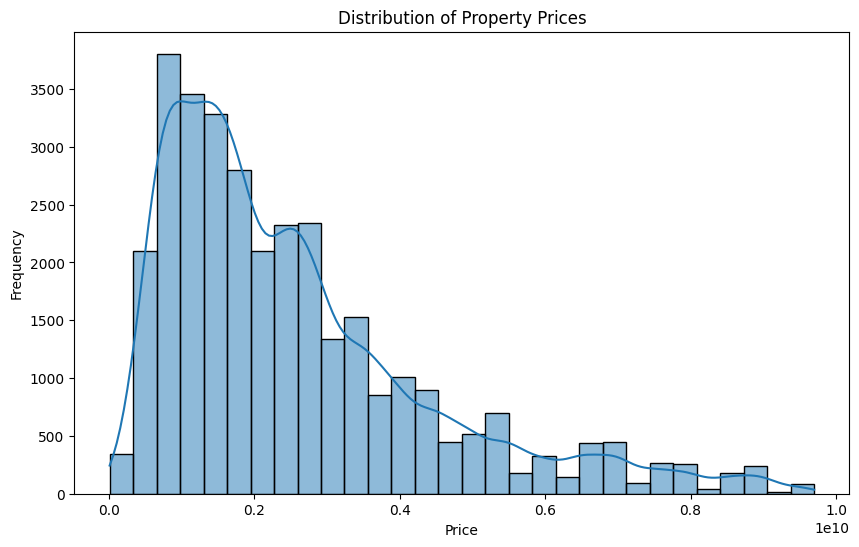

In [ ]:
# Visualize the distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


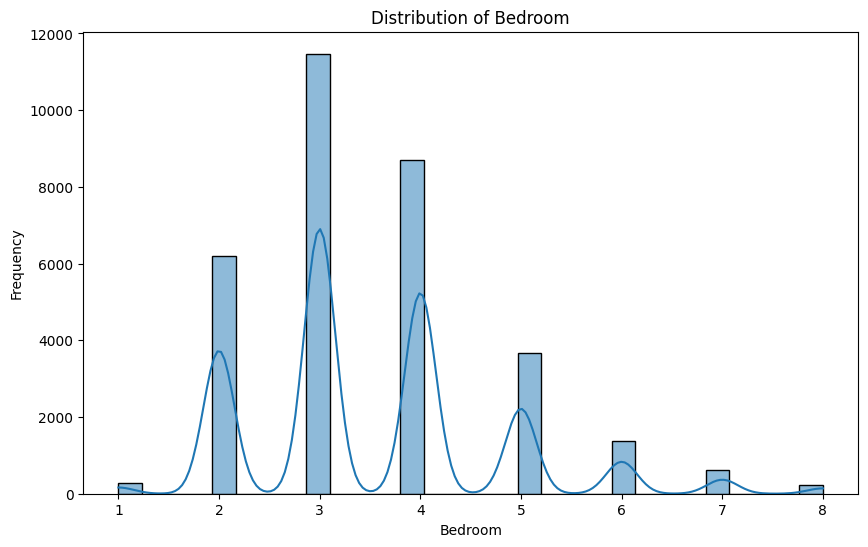

In [ ]:
# Visualize the distribution of BEDROOM
plt.figure(figsize=(10, 6))
sns.histplot(data['Bedroom'], bins=30, kde=True)
plt.title('Distribution of Bedroom')
plt.xlabel('Bedroom')
plt.ylabel('Frequency')
plt.show()

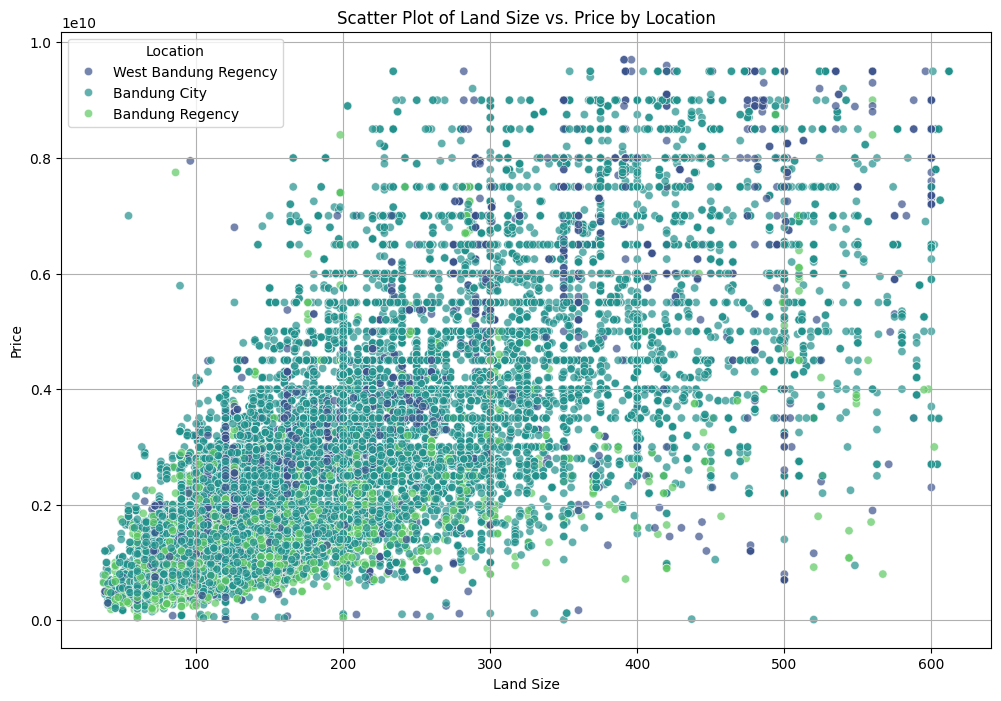

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Land', y='Price', hue='City/Regency', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Land Size vs. Price by Location')
plt.xlabel('Land Size')
plt.ylabel('Price')
plt.legend(title='Location')
plt.grid(True)
plt.show()

In [ ]:
data.dtypes

,0
Unnamed: 0,int64
Price,float64
Location,object
Bedroom,int64
Bathroom,float64
Carport,float64
Land,float64
Building,float64
Month,float64
City/Regency,object


In [ ]:
# Separate numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
numeric_data
numeric_data.columns

Index(['Unnamed: 0', 'Price', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# correlation matrix
correlation = numeric_data.corr()

# correlation with price
if 'Price' in correlation.columns:
    price_corr = correlation['Price'].sort_values(ascending=False)
    print("Correlation with Price:\n", price_corr)
else:
    print("Price column not found in numeric data.")



Correlation with Price:
 Price         1.000000
Land          0.773653
Building      0.744226
Bathroom      0.523423
Bedroom       0.436896
Latitude      0.274701
Carport       0.255847
Month         0.022700
Unnamed: 0    0.021777
Longitude    -0.263013
Name: Price, dtype: float64


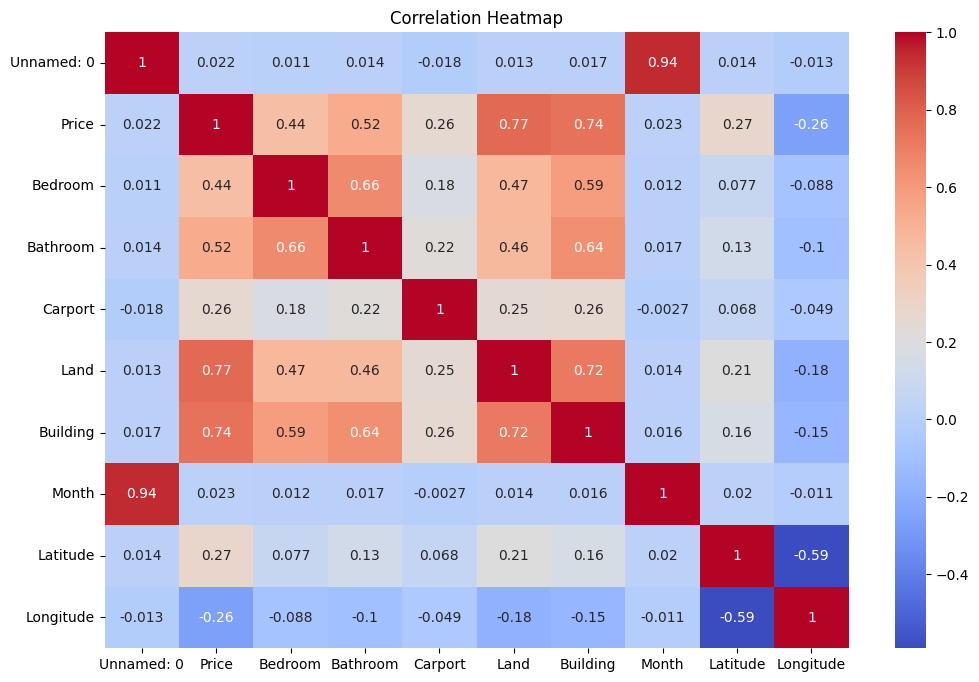

In [ ]:
# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Data Preparation for Modeling

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9


In [ ]:
#filter missing value columns
missing_val_col=data.columns[data.isnull().any()]
missing_val_col

Index(['Location', 'Bathroom', 'Carport', 'Land', 'Building', 'Month',
       'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# Filter only numeric columns with missing values
missing_val_col_num = data[missing_val_col].select_dtypes(include=np.number).columns
missing_val_col_num

Index(['Bathroom', 'Carport', 'Land', 'Building', 'Month', 'Latitude',
       'Longitude'],
      dtype='object')

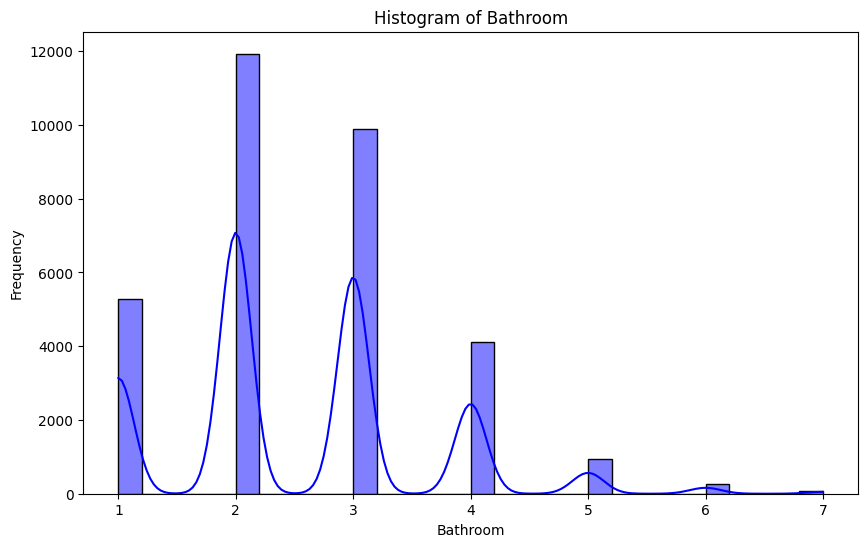

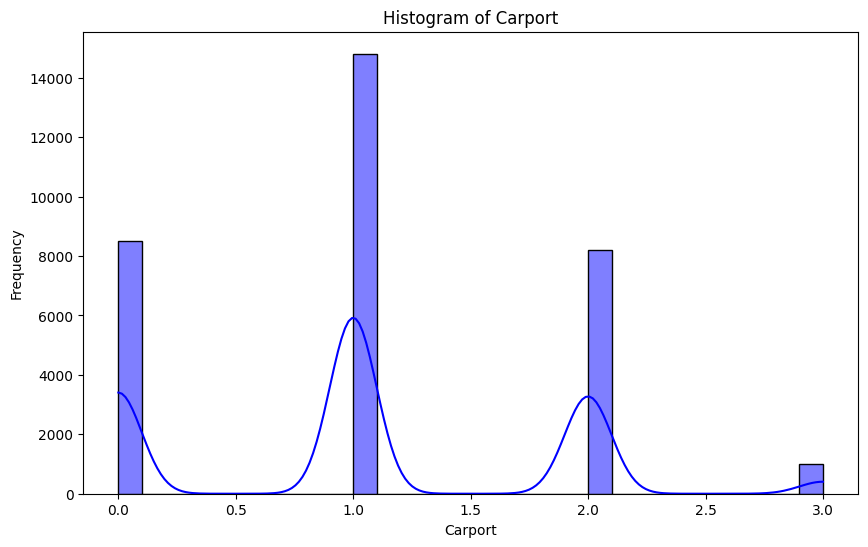

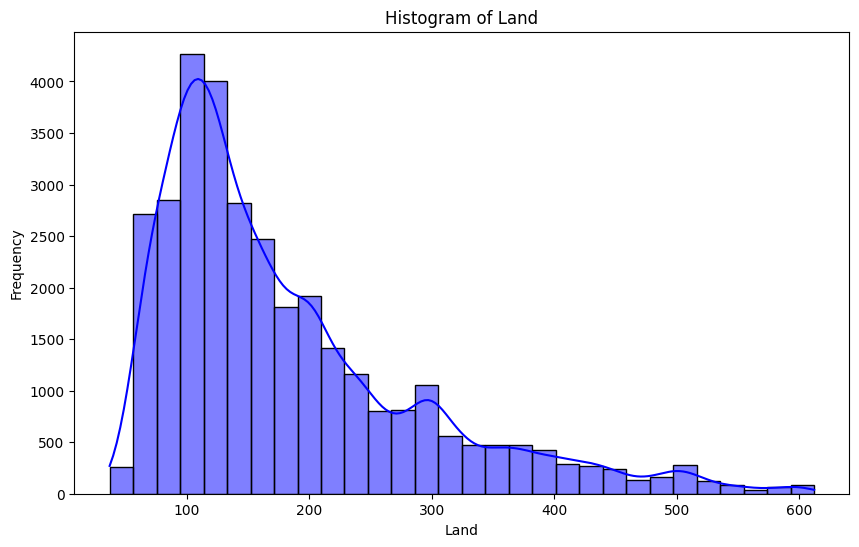

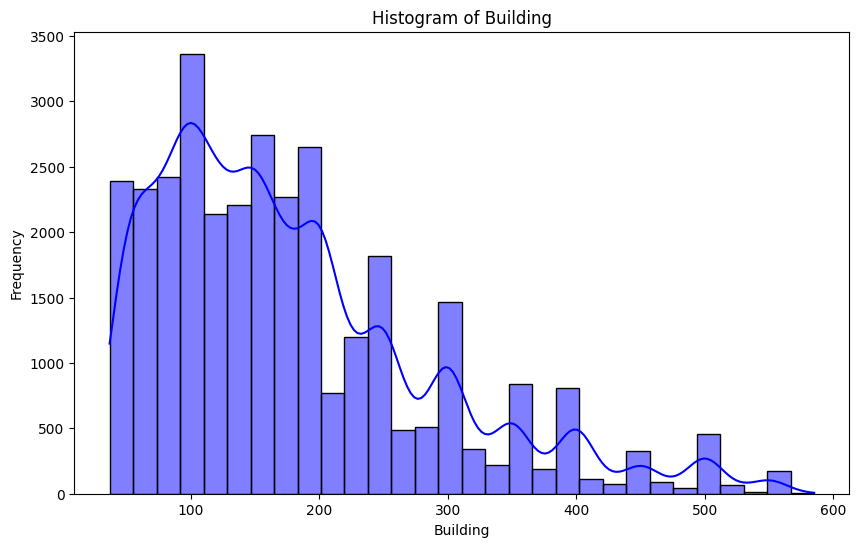

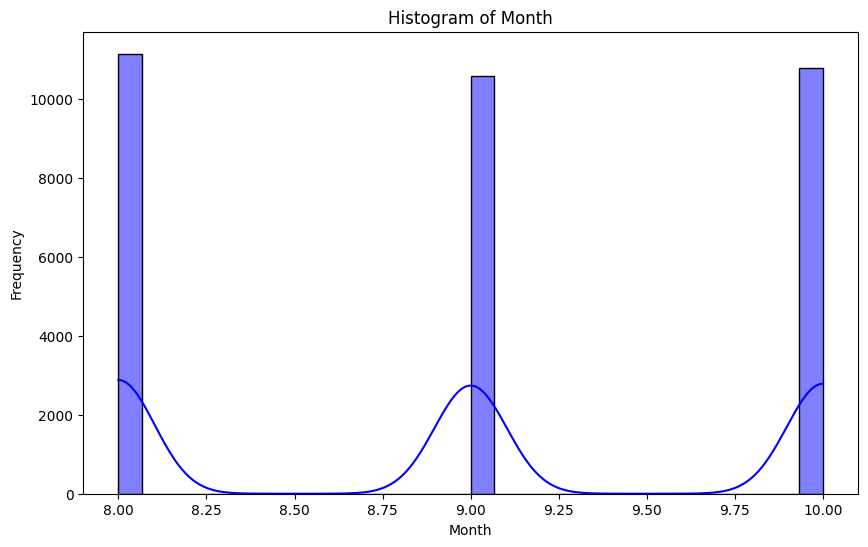

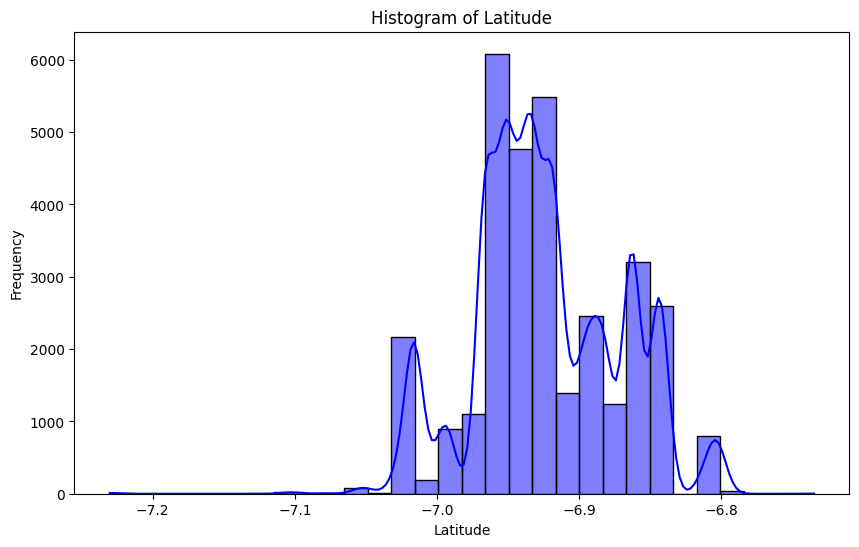

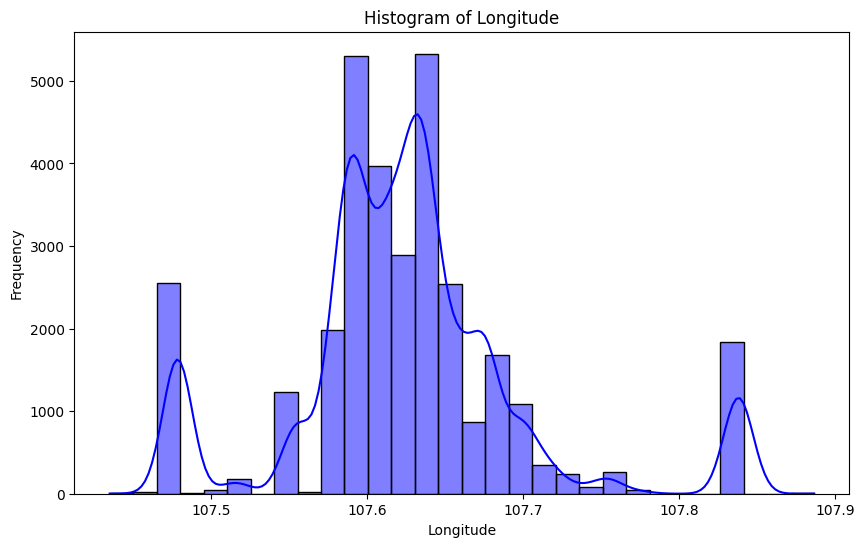

In [ ]:
# Plot histograms for each column with missing values
for col in missing_val_col_num:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col],kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [ ]:
# Fill missing values in these columns with the median of each column
for col in missing_val_col_num:
    data[col].fillna(data[col].median(), inplace=True)

<ipython-input-40-7e38caa5b17f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
Price,0
Location,9
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,9


In [ ]:
# Filter only non numeric columns with missing values
missing_val_col_obj = data[missing_val_col].select_dtypes(include='object').columns
missing_val_col_obj

Index(['Location', 'City/Regency'], dtype='object')

In [ ]:
# Fill missing values in these columns with the mode of each column
for col in missing_val_col_obj:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-43-48123bc7a737>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,0


Handling outlier

In [ ]:
# Identify numeric columns
num_cols = data.select_dtypes(include=np.number).columns
num_cols

Index(['Unnamed: 0', 'Price', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'Latitude', 'Longitude'],
      dtype='object')

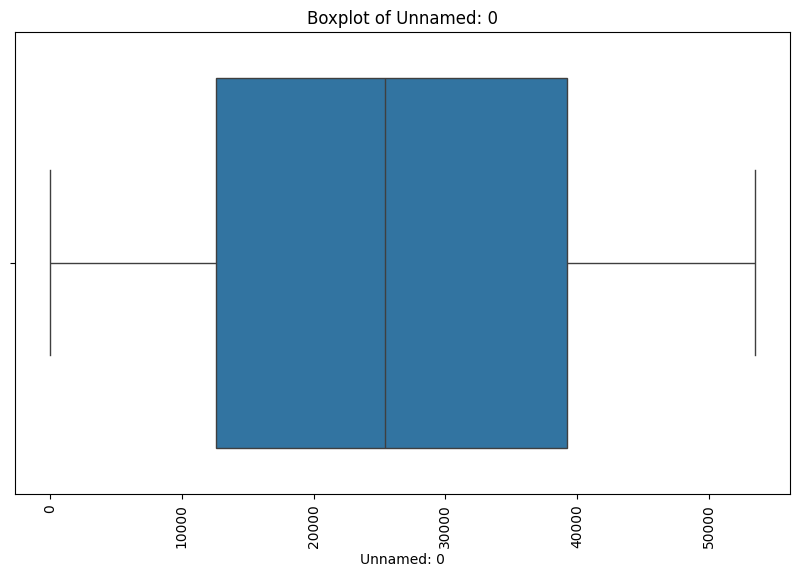

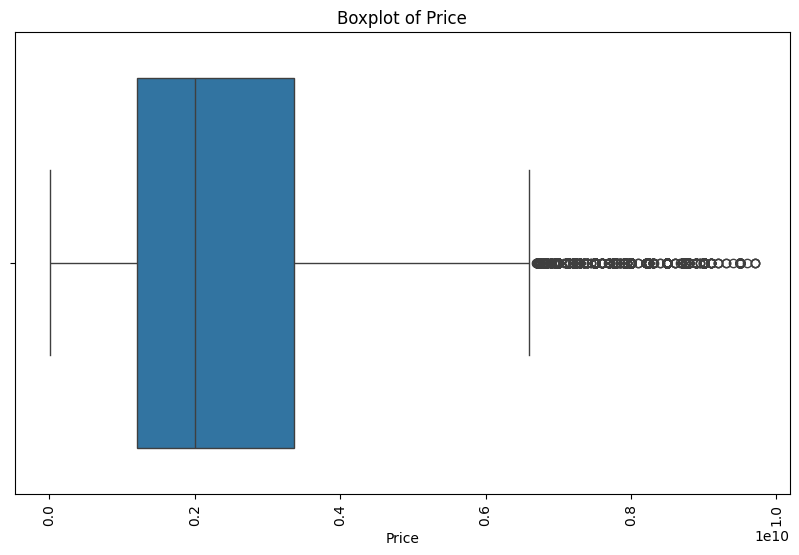

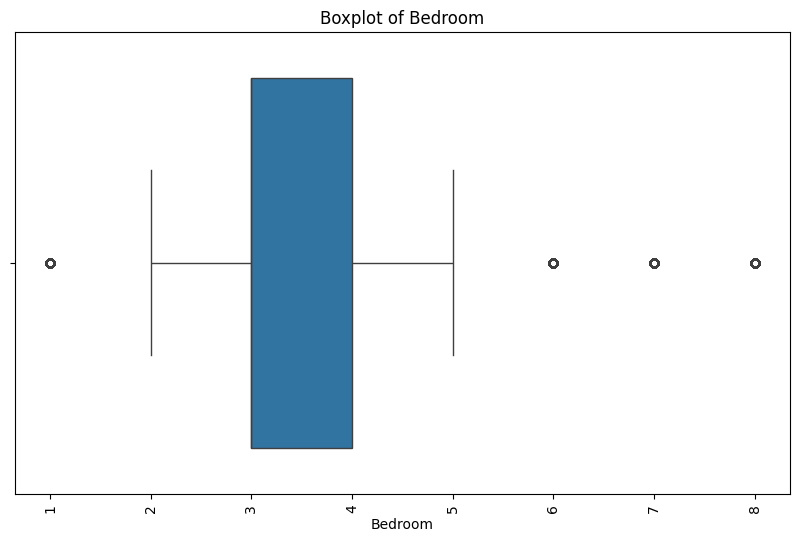

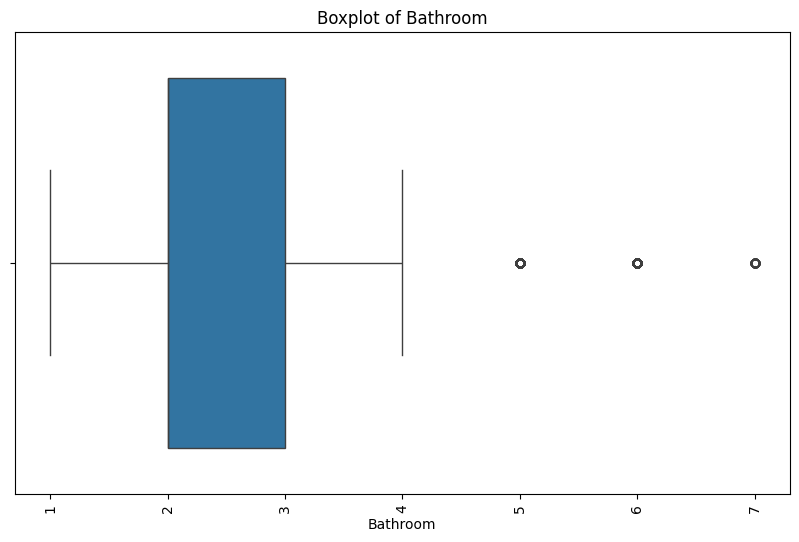

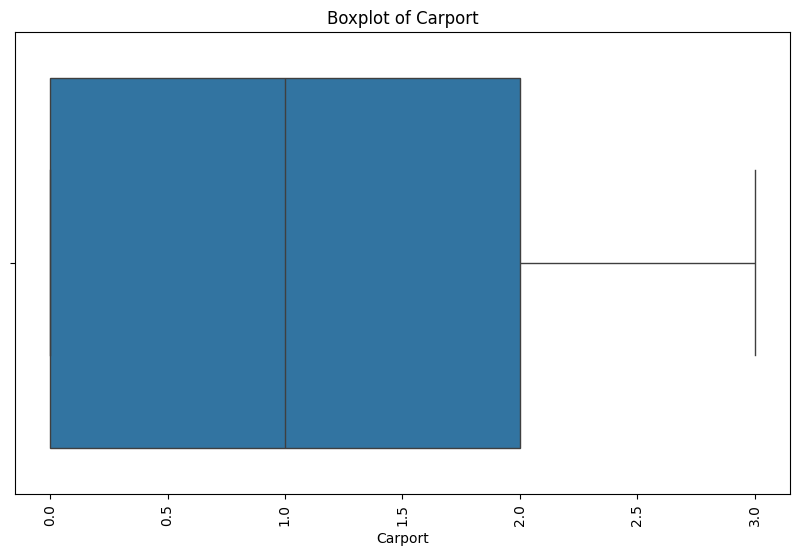

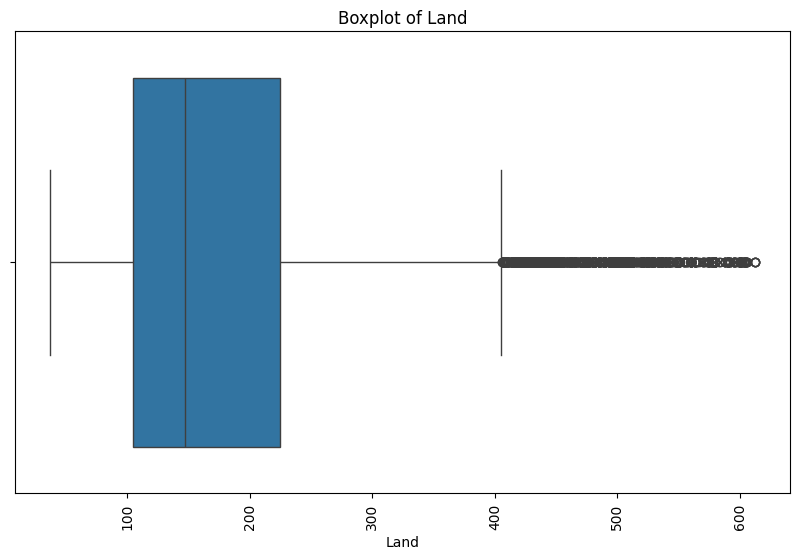

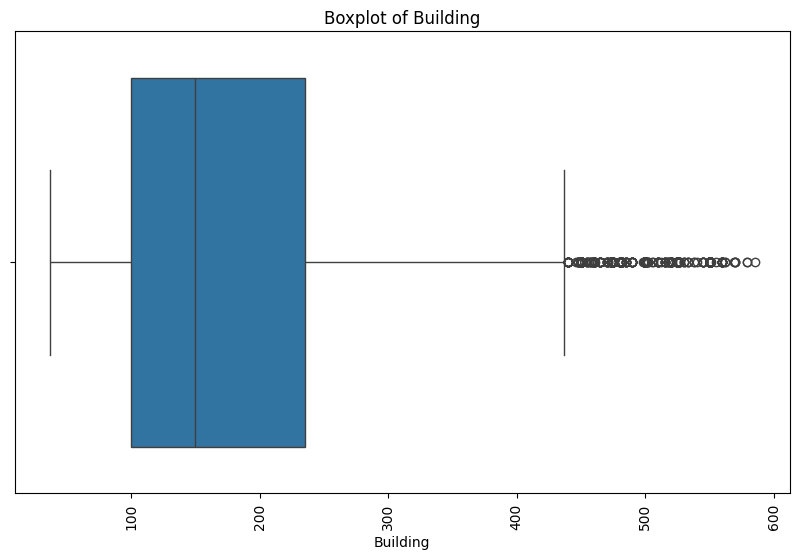

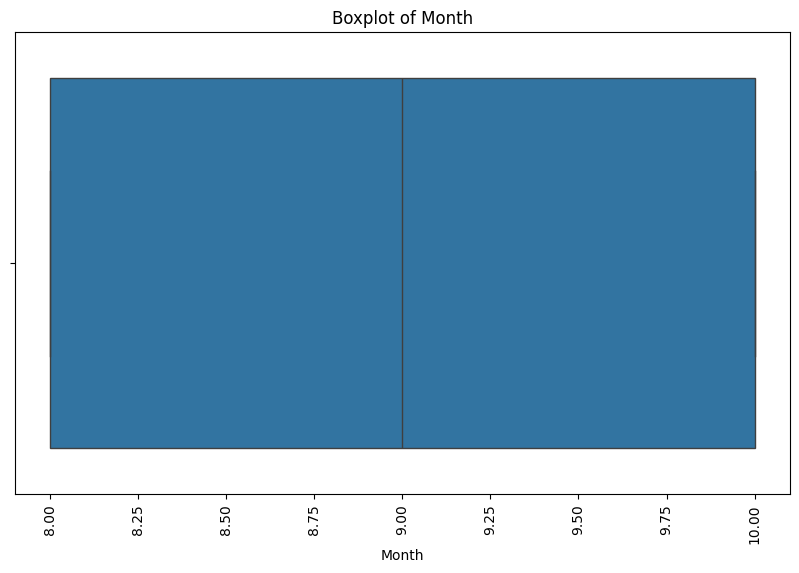

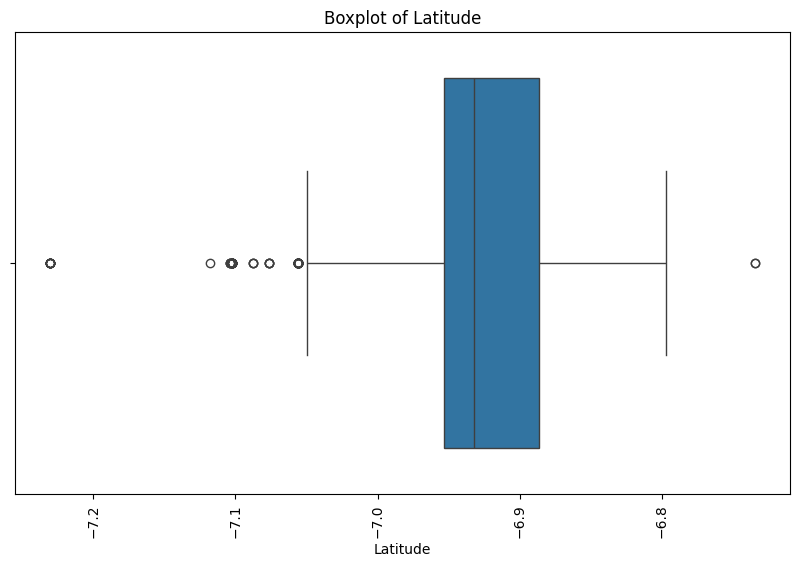

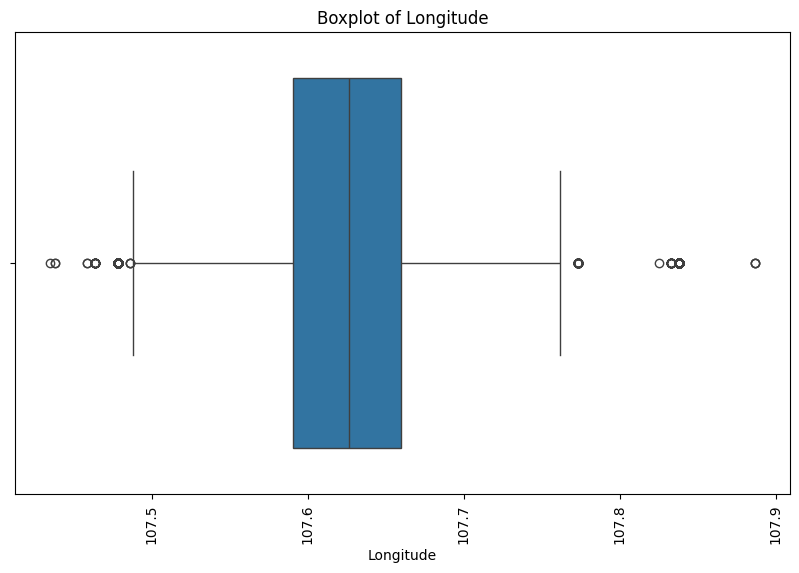

In [ ]:
# Loop through each numeric column and create a boxplot
for col in num_cols:
    plt.figure(figsize=(10, 6))  # Set the size of each individual plot
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
features =['Price', 'Bedroom', 'Bathroom', 'Land',
       'Building', 'Latitude', 'Longitude']

Feature: Price
  Q1: 1200000000.0
  Q3: 3365000000.0
  IQR: 2165000000.0
  Lower limit: -2047500000.0
  Upper limit: 6612500000.0
  Outliers: []


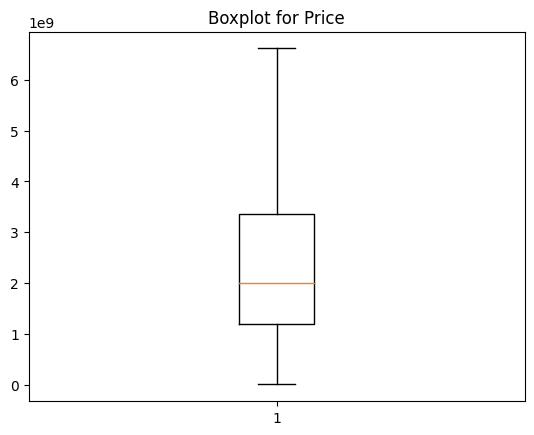

Feature: Bedroom
  Q1: 3.0
  Q3: 4.0
  IQR: 1.0
  Lower limit: 1.5
  Upper limit: 5.5
  Outliers: []


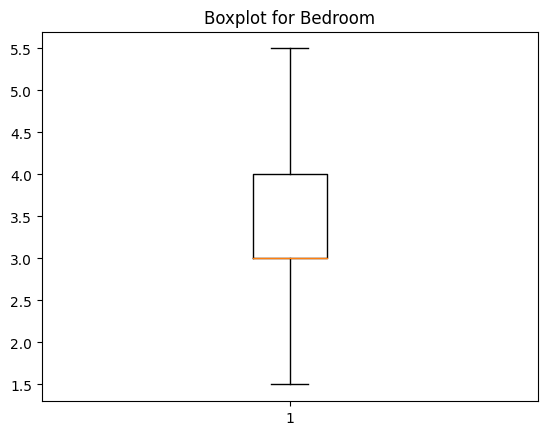

Feature: Bathroom
  Q1: 2.0
  Q3: 3.0
  IQR: 1.0
  Lower limit: 0.5
  Upper limit: 4.5
  Outliers: []


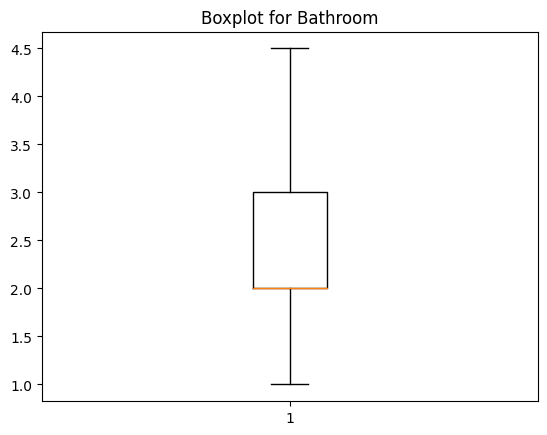

Feature: Land
  Q1: 105.0
  Q3: 225.0
  IQR: 120.0
  Lower limit: -75.0
  Upper limit: 405.0
  Outliers: []


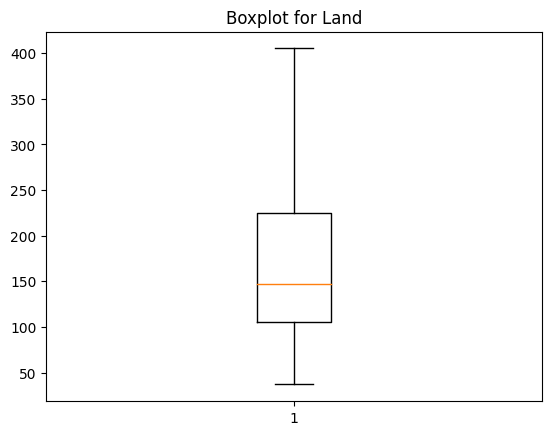

Feature: Building
  Q1: 100.0
  Q3: 235.0
  IQR: 135.0
  Lower limit: -102.5
  Upper limit: 437.5
  Outliers: []


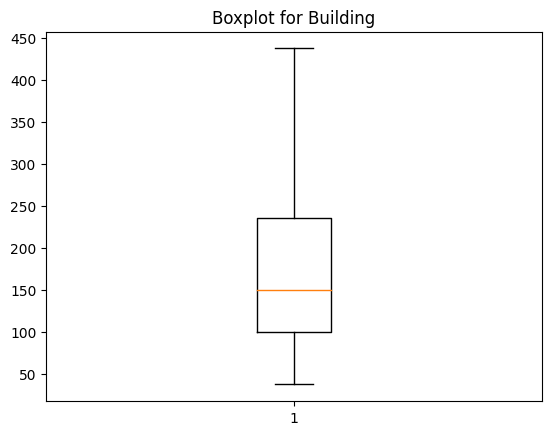

Feature: Latitude
  Q1: -6.9529815
  Q3: -6.8863341
  IQR: 0.06664739999999991
  Lower limit: -7.052952599999999
  Upper limit: -6.786363
  Outliers: []


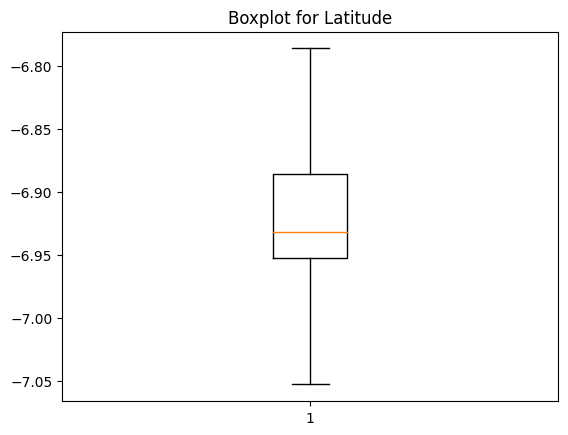

Feature: Longitude
  Q1: 107.590747404463
  Q3: 107.659881384691
  IQR: 0.06913398022800266
  Lower limit: 107.487046434121
  Upper limit: 107.76358235503301
  Outliers: []


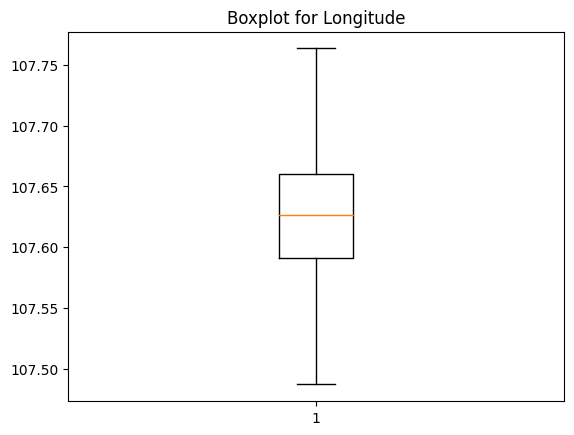

In [ ]:
# Function to detect and cap outliers for a given feature
def handle_outliers(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5 * iqr
    upp_lim = q3 + 1.5 * iqr

    outliers = df[feature][(df[feature] < low_lim) | (df[feature] > upp_lim)]
    df[feature] = df[feature].clip(lower=low_lim, upper=upp_lim)

    return outliers, low_lim, upp_lim

# Iterate over each feature to handle outliers
for feature in features:
    outliers, low_lim, upp_lim = handle_outliers(data, feature)
    print(f'Feature: {feature}')
    print(f'  Q1: {data[feature].quantile(0.25)}')
    print(f'  Q3: {data[feature].quantile(0.75)}')
    print(f'  IQR: {data[feature].quantile(0.75) - data[feature].quantile(0.25)}')
    print(f'  Lower limit: {low_lim}')
    print(f'  Upper limit: {upp_lim}')
    print(f'  Outliers: {outliers.tolist()}')

    # Plotting the boxplot for each feature
    plt.figure()
    plt.boxplot(data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [ ]:
#drop unnecessary columns
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2.0,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.487046
1,8.500000e+08,Parongpong,2.0,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3.0,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2.0,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4.0,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271
...,...,...,...,...,...,...,...,...,...,...,...
32531,4.750000e+08,Rancasari,2.0,1.0,1.0,60.0,65.0,10.0,Bandung City,-6.953536,107.675210
32532,6.612500e+09,Bojongloa Kidul,5.0,4.5,2.0,405.0,437.5,10.0,Bandung City,-6.947036,107.596271
32533,5.500000e+09,Sukasari,5.0,3.0,2.0,405.0,283.0,10.0,Bandung City,-6.863000,107.588100
32534,3.950000e+09,Regol,4.0,3.0,2.0,182.0,380.0,10.0,Bandung City,-6.939713,107.613797


In [ ]:
# use onehot encoder for 'Location', 'City/Regency'

from sklearn.preprocessing import OneHotEncoder
# Columns to encode
columns_to_encode = ['Location', 'City/Regency']

# One-hot encode specified columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
encoded_data = encoder.fit_transform(data[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Drop original columns and concatenate one-hot encoded columns
data = data.drop(columns=columns_to_encode)
data_encoded = pd.concat([data, encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
print(data_encoded.head())

# Display the first few rows of the encoded DataFrame
print(data_encoded.head())

          Price  Bedroom  Bathroom  Carport   Land  Building  Month  Latitude  \
0  1.600000e+09      2.0       1.0      1.0   72.0      50.0    8.0 -6.843600   
1  8.500000e+08      2.0       1.0      1.0   70.0      80.0    8.0 -6.803228   
2  8.750000e+08      3.0       2.0      1.0   60.0      70.0    8.0 -6.965549   
3  1.750000e+09      2.0       3.0      1.0   90.0      94.0    8.0 -6.993945   
4  4.900000e+09      4.0       4.0      0.0  200.0     300.0    8.0 -6.947036   

    Longitude  Location_Antapani  ...  Location_Rancaekek  Location_Rancasari  \
0  107.487046                0.0  ...                 0.0                 0.0   
1  107.581804                0.0  ...                 0.0                 0.0   
2  107.637926                0.0  ...                 0.0                 0.0   
3  107.643700                0.0  ...                 0.0                 0.0   
4  107.596271                0.0  ...                 0.0                 0.0   

   Location_Regol  Locatio

In [ ]:
# Define features (X) and target variable (y)
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']


In [ ]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(26028, 75) (6508, 75) (26028,) (6508,)


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error, r2_score

KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
metric_k = []
neighbors = np.arange(1,15)

# Iterate over the range of neighbors
for k in neighbors:
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    metric_k.append(mse)
metric_k

[9.803294676167793e+17,
 7.892899349070373e+17,
 7.056587787210614e+17,
 6.79036878003515e+17,
 6.56955920579287e+17,
 6.381251349567626e+17,
 6.295417146384983e+17,
 6.263275631086259e+17,
 6.240331707352585e+17,
 6.207404734069606e+17,
 6.202402263044339e+17,
 6.180792821836799e+17,
 6.13119054894013e+17,
 6.096532612746164e+17]

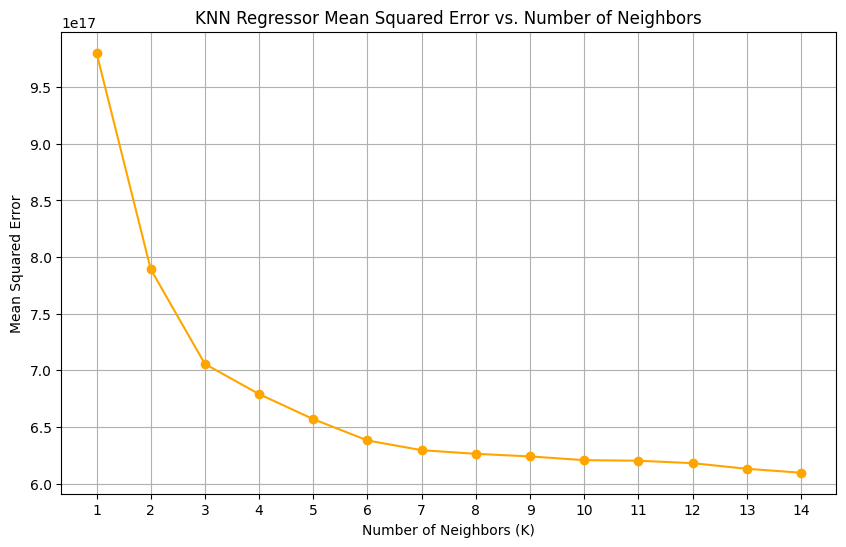

In [ ]:
# Plotting the mean squared errors
plt.figure(figsize=(10, 6))
plt.plot(neighbors, metric_k, marker='o', color='orange')
plt.title('KNN Regressor Mean Squared Error vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.xticks(neighbors)
plt.grid()
plt.show()

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test,  y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test,  y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Calculate R² score
r2 = r2_score(y_test,  y_pred)
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 609653261274616448.00
Mean Absolute Error: 540595335.41
R² Score: 0.78


In [ ]:
 # List of classifiers to evaluate
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score


classifiers = {
    "Lasso Regression": Lasso(alpha=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=13),
    "Decision Tree": DecisionTreeRegressor(),

}

In [ ]:
for name, clf in classifiers.items():
    # Cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert back to positive MSE
    print(f"{name} - Cross-Validation MSE: {mse_scores.mean():.4f} (+/- {mse_scores.std():.4f})")

    # Fit the regressor on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate mean squared error and R² score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Test MSE: {mse:.4f}")
    print(f"{name} - Test R² Score: {r2:.4f}")
    print("\n" + "="*60 + "\n")

Lasso Regression - Cross-Validation MSE: 652299525571584256.0000 (+/- 15672506071783272.0000)
Lasso Regression - Test MSE: 625413151659867520.0000
Lasso Regression - Test R² Score: 0.7777


KNN - Cross-Validation MSE: 640023790434884864.0000 (+/- 13888452990627728.0000)
KNN - Test MSE: 613119054894013056.0000
KNN - Test R² Score: 0.7821


Decision Tree - Cross-Validation MSE: 596263914698007808.0000 (+/- 19998194449706076.0000)
Decision Tree - Test MSE: 547632190416192768.0000
Decision Tree - Test R² Score: 0.8053




Decision Tree Test having largest R² Score: 0.8053

In [ ]:
Hyperparameter tuning

In [ ]:

from sklearn.model_selection import GridSearchCV


# Define an expanded parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree
DT_model = DecisionTreeRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")



Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [ ]:
This report summarizes the analysis performed on real estate property data, focusing on developing a predictive model to estimate property prices. Multiple regression models were considered
For the Decision Tree Regressor,The model achieved an R² score of 0.8053. The Decision Tree model provided better performance.
 Properties in premium locations had significantly higher prices.